<a href="https://colab.research.google.com/github/Razakmd2024/Razakmd2024/blob/main/ubdreports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project:  EDA of Unified Births & Deaths Registrations 
# Under EODB (Easy of Doing Business), telangana Govt. encouraging all Gram Panchayats to issue birth and death certificates through online mode only. No Manual certificates are entertained. 
# To Monitor the issue of Birth and Death certificates through ubd.telangana.gov.in portal

# Download the required Libraries 

In [1]:
import pandas as pd
import numpy as np
from pandas import read_html
import matplotlib.pyplot as plt
import seaborn as sns

# Read the url of Urban local bodies from UBDMIS report page

In [2]:
url="http://ubdmis.telangana.gov.in/ubdmisTGTotalStatus.do?rlb_type=3&pstcode=35&style=bluetheme"

# Loading the data into URL Object

In [3]:
ubd=pd.io.html.read_html(url)
print(ubd)

[                                                   0
0  UNIFIED BIRTH & DEATH REGISTRATION-MANAGEMENT ...
1  Birth & Death Signed Records for the Local Bod...,            0            1                    2              3             4  \
0      Sl.No  Reg.Unit Id        District Name    Mandal Name  Office Title   
1          1        20001             ADILABAD       Adilabad      Allikori   
2          2        20002             ADILABAD       Adilabad       Ankapur   
3          3        20003             ADILABAD       Adilabad        Ankoli   
4          4        20005             ADILABAD       Adilabad       Arli(B)   
...      ...          ...                  ...            ...           ...   
12766  12766       208244  YADADRI BHUVANAGIRI  Yadagirigutta     Saduvally   
12767  12767       208245  YADADRI BHUVANAGIRI  Yadagirigutta      Saidapur   
12768  12768       208246  YADADRI BHUVANAGIRI  Yadagirigutta    Tallagudem   
12769  12769       208248  YADADRI BHUVANAGIRI  Y

# Above UBD object contains two tables.. consider only required table for data analysis

In [4]:
table=ubd[1]
print(table)
data=table.copy()

           0            1                    2              3             4  \
0      Sl.No  Reg.Unit Id        District Name    Mandal Name  Office Title   
1          1        20001             ADILABAD       Adilabad      Allikori   
2          2        20002             ADILABAD       Adilabad       Ankapur   
3          3        20003             ADILABAD       Adilabad        Ankoli   
4          4        20005             ADILABAD       Adilabad       Arli(B)   
...      ...          ...                  ...            ...           ...   
12766  12766       208244  YADADRI BHUVANAGIRI  Yadagirigutta     Saduvally   
12767  12767       208245  YADADRI BHUVANAGIRI  Yadagirigutta      Saidapur   
12768  12768       208246  YADADRI BHUVANAGIRI  Yadagirigutta    Tallagudem   
12769  12769       208248  YADADRI BHUVANAGIRI  Yadagirigutta    Wangapally   
12770  Total        Total                Total          Total         Total   

                               5                   

# Assign the first row data to the dataframe columns Attribute 

In [5]:
data.columns = data.iloc[0]

data.drop(0, axis=0,inplace=True)
print(data.head())


0 Sl.No Reg.Unit Id District Name Mandal Name Office Title  \
1     1       20001      ADILABAD    Adilabad     Allikori   
2     2       20002      ADILABAD    Adilabad      Ankapur   
3     3       20003      ADILABAD    Adilabad       Ankoli   
4     4       20005      ADILABAD    Adilabad      Arli(B)   
5     5       20006      ADILABAD    Adilabad       Asodha   

0 Token Registered(Yes/No) Birth Records Signed / Total Birth Records  \
1                      Yes                                     0 /  0   
2                      Yes                                     0 /  0   
3                      Yes                                    0 /  11   
4                      Yes                                     0 /  3   
5                      Yes                                     0 /  0   

0 Death Records Signed / Total Death Records  
1                                    0 /  10  
2                                    0 /  15  
3                                    0 /  56  


In [6]:
data=data.reset_index()
data.drop(['index','Sl.No'], axis=1, inplace=True)
print(data.head())

0 Reg.Unit Id District Name Mandal Name Office Title Token Registered(Yes/No)  \
0       20001      ADILABAD    Adilabad     Allikori                      Yes   
1       20002      ADILABAD    Adilabad      Ankapur                      Yes   
2       20003      ADILABAD    Adilabad       Ankoli                      Yes   
3       20005      ADILABAD    Adilabad      Arli(B)                      Yes   
4       20006      ADILABAD    Adilabad       Asodha                      Yes   

0 Birth Records Signed / Total Birth Records  \
0                                     0 /  0   
1                                     0 /  0   
2                                    0 /  11   
3                                     0 /  3   
4                                     0 /  0   

0 Death Records Signed / Total Death Records  
0                                    0 /  10  
1                                    0 /  15  
2                                    0 /  56  
3                                   

# spliting the birth and death records

In [7]:
birth=data['Birth Records Signed / Total Birth Records'].str.split(" /  ",n=1, expand=True)
data['Birth Records Signed']=birth[0]
data['Total Birth Records']=birth[1]
data.drop(['Birth Records Signed / Total Birth Records'], axis=1,inplace =True)
print(data.head())

0 Reg.Unit Id District Name Mandal Name Office Title Token Registered(Yes/No)  \
0       20001      ADILABAD    Adilabad     Allikori                      Yes   
1       20002      ADILABAD    Adilabad      Ankapur                      Yes   
2       20003      ADILABAD    Adilabad       Ankoli                      Yes   
3       20005      ADILABAD    Adilabad      Arli(B)                      Yes   
4       20006      ADILABAD    Adilabad       Asodha                      Yes   

0 Death Records Signed / Total Death Records Birth Records Signed  \
0                                    0 /  10                    0   
1                                    0 /  15                    0   
2                                    0 /  56                    0   
3                                    0 /  16                    0   
4                                     0 /  4                    0   

0 Total Birth Records  
0                   0  
1                   0  
2                  11  
3 

In [8]:
death = data['Death Records Signed / Total Death Records'].str.split(" /  ",n=1, expand =True )
data['Death Records Signed']=death[0]
data['Total Death Records']=death[1]
data.drop(['Death Records Signed / Total Death Records'], axis=1, inplace= True)
print(data.head())

0 Reg.Unit Id District Name Mandal Name Office Title Token Registered(Yes/No)  \
0       20001      ADILABAD    Adilabad     Allikori                      Yes   
1       20002      ADILABAD    Adilabad      Ankapur                      Yes   
2       20003      ADILABAD    Adilabad       Ankoli                      Yes   
3       20005      ADILABAD    Adilabad      Arli(B)                      Yes   
4       20006      ADILABAD    Adilabad       Asodha                      Yes   

0 Birth Records Signed Total Birth Records Death Records Signed  \
0                    0                   0                    0   
1                    0                   0                    0   
2                    0                  11                    0   
3                    0                   3                    0   
4                    0                   0                    0   

0 Total Death Records  
0                  10  
1                  15  
2                  56  
3             

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12770 entries, 0 to 12769
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Reg.Unit Id               12770 non-null  object
 1   District Name             12770 non-null  object
 2   Mandal Name               12770 non-null  object
 3   Office Title              12770 non-null  object
 4   Token Registered(Yes/No)  12770 non-null  object
 5   Birth Records Signed      12770 non-null  object
 6   Total Birth Records       12769 non-null  object
 7   Death Records Signed      12770 non-null  object
 8   Total Death Records       12769 non-null  object
dtypes: object(9)
memory usage: 898.0+ KB


In [10]:
data.drop(12769, axis=0, inplace =True)

In [11]:
data=data.astype({'Birth Records Signed':'int64', 'Total Birth Records':'int64', 'Death Records Signed':'int64', 'Total Death Records':'int64'})

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12769 entries, 0 to 12768
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Reg.Unit Id               12769 non-null  object
 1   District Name             12769 non-null  object
 2   Mandal Name               12769 non-null  object
 3   Office Title              12769 non-null  object
 4   Token Registered(Yes/No)  12769 non-null  object
 5   Birth Records Signed      12769 non-null  int64 
 6   Total Birth Records       12769 non-null  int64 
 7   Death Records Signed      12769 non-null  int64 
 8   Total Death Records       12769 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 997.6+ KB


In [13]:
data['Token Registered(Yes/No)'].unique()

array(['Yes', 'No'], dtype=object)

In [14]:
data.replace('Yes',1, inplace=True)
data.replace('No',0, inplace=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12769 entries, 0 to 12768
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Reg.Unit Id               12769 non-null  object
 1   District Name             12769 non-null  object
 2   Mandal Name               12769 non-null  object
 3   Office Title              12769 non-null  object
 4   Token Registered(Yes/No)  12769 non-null  int64 
 5   Birth Records Signed      12769 non-null  int64 
 6   Total Birth Records       12769 non-null  int64 
 7   Death Records Signed      12769 non-null  int64 
 8   Total Death Records       12769 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 997.6+ KB


In [16]:
data.head()

,Reg.Unit Id,District Name,Mandal Name,Office Title,Token Registered(Yes/No),Birth Records Signed,Total Birth Records,Death Records Signed,Total Death Records
0,20001,ADILABAD,Adilabad,Allikori,1,0,0,0,10
1,20002,ADILABAD,Adilabad,Ankapur,1,0,0,0,15
2,20003,ADILABAD,Adilabad,Ankoli,1,0,11,0,56
3,20005,ADILABAD,Adilabad,Arli(B),1,0,3,0,16
4,20006,ADILABAD,Adilabad,Asodha,1,0,0,0,4


In [17]:
data.rename(columns={'Office Title':'Gram Panchayat Name', 'Token Registered(Yes/No)':'Token Registered GPs'},inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12769 entries, 0 to 12768
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Reg.Unit Id           12769 non-null  object
 1   District Name         12769 non-null  object
 2   Mandal Name           12769 non-null  object
 3   Gram Panchayat Name   12769 non-null  object
 4   Token Registered GPs  12769 non-null  int64 
 5   Birth Records Signed  12769 non-null  int64 
 6   Total Birth Records   12769 non-null  int64 
 7   Death Records Signed  12769 non-null  int64 
 8   Total Death Records   12769 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 997.6+ KB


In [20]:
col=['Token Registered GPs','Birth Records Signed','Total Birth Records', 'Death Records Signed', 'Total Death Records']

0                     Token Registered GPs  Birth Records Signed  \
District Name                                                      
ADILABAD                               456                   102   
BHADRADRI KOTHAGUDEM                   414                 35923   
HANUMAKONDA                            208                  1539   
JAGTIAL                                380                  1524   
JANGOAN                                269                  5473   

0                     Total Birth Records  Death Records Signed  \
District Name                                                     
ADILABAD                             3505                   161   
BHADRADRI KOTHAGUDEM                43007                  8683   
HANUMAKONDA                         11833                   556   
JAGTIAL                              5362                  1441   
JANGOAN                             10119                  2695   

0                     Total Death Records  
District 

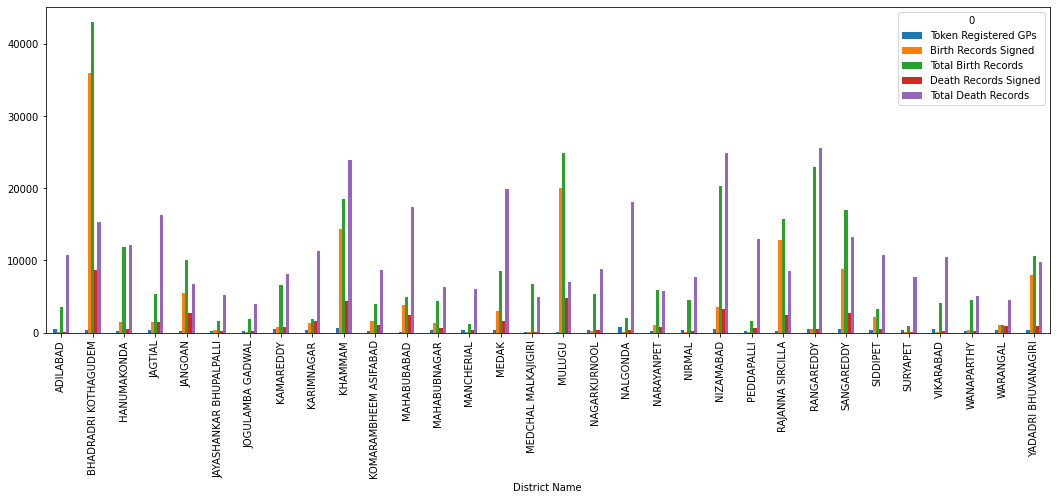

In [28]:
print(data.groupby('District Name')[col].sum().head())
data.groupby('District Name')[col].sum().plot(kind='bar',figsize=(18,6))


In [29]:
data.columns

Index(['Reg.Unit Id', 'District Name', 'Mandal Name', 'Gram Panchayat Name',
       'Token Registered GPs', 'Birth Records Signed', 'Total Birth Records',
       'Death Records Signed', 'Total Death Records'],
      dtype='object', name=0)

In [30]:
data.isnull().sum()

0
Reg.Unit Id             0
District Name           0
Mandal Name             0
Gram Panchayat Name     0
Token Registered GPs    0
Birth Records Signed    0
Total Birth Records     0
Death Records Signed    0
Total Death Records     0
dtype: int64

In [32]:
print(data.groupby(['District Name','Mandal Name'])[col].sum())

0                                  Token Registered GPs  Birth Records Signed  \
District Name       Mandal Name                                                 
ADILABAD            Adilabad                         34                     0   
                    Bazarhathnoor                    30                     0   
                    Bela                             37                     5   
                    Bheempur                         25                     0   
                    Boath                            30                     4   
...                                                 ...                   ...   
YADADRI BHUVANAGIRI Pochampalle                      21                     0   
                    Rajapet                          20                     2   
                    Ramannapeta                      22                  7895   
                    Valigonda                        34                    24   
                    Yadagiri

In [33]:
data.head()

,Reg.Unit Id,District Name,Mandal Name,Gram Panchayat Name,Token Registered GPs,Birth Records Signed,Total Birth Records,Death Records Signed,Total Death Records
0,20001,ADILABAD,Adilabad,Allikori,1,0,0,0,10
1,20002,ADILABAD,Adilabad,Ankapur,1,0,0,0,15
2,20003,ADILABAD,Adilabad,Ankoli,1,0,11,0,56
3,20005,ADILABAD,Adilabad,Arli(B),1,0,3,0,16
4,20006,ADILABAD,Adilabad,Asodha,1,0,0,0,4


In [46]:
dist=data[data['District Name']=='PEDDAPALLI']
dist=dist.reset_index()
dist.drop('index',axis=1,inplace=True)
print(dist)

0   Reg.Unit Id District Name Mandal Name Gram Panchayat Name  \
0          2936    PEDDAPALLI  Anthargaon          Akenapalli   
1          2937    PEDDAPALLI  Anthargaon          Anthergoan   
2          2938    PEDDAPALLI  Anthargaon        Brahmanpalli   
3          2939    PEDDAPALLI  Anthargaon            Eklaspur   
4         25329    PEDDAPALLI  Anthargaon             Esampet   
..          ...           ...         ...                 ...   
261       25395    PEDDAPALLI  Sultanabad         Ramunipalli   
262        2860    PEDDAPALLI  Sultanabad  Regadi Maddi Kunta   
263        2861    PEDDAPALLI  Sultanabad       Sambaiahpalli   
264        2862    PEDDAPALLI  Sultanabad             Suddala   
265        2864    PEDDAPALLI  Sultanabad           Thogarrai   

0    Token Registered GPs  Birth Records Signed  Total Birth Records  \
0                       1                     0                    0   
1                       1                     0                    0   
2  

In [35]:
data['District Name'].unique()

array(['ADILABAD', 'BHADRADRI KOTHAGUDEM', 'HANUMAKONDA', 'JAGTIAL',
       'JANGOAN', 'JAYASHANKAR BHUPALPALLI', 'JOGULAMBA GADWAL',
       'KAMAREDDY', 'KARIMNAGAR', 'KHAMMAM', 'KOMARAMBHEEM ASIFABAD',
       'MAHABUBABAD', 'MAHABUBNAGAR', 'MANCHERIAL', 'MEDAK',
       'MEDCHAL MALKAJIGIRI', 'MULUGU', 'NAGARKURNOOL', 'NALGONDA',
       'NARAYANPET', 'NIRMAL', 'NIZAMABAD', 'PEDDAPALLI',
       'RAJANNA SIRCILLA', 'RANGAREDDY', 'SANGAREDDY', 'SIDDIPET',
       'SURYAPET', 'VIKARABAD', 'WANAPARTHY', 'WARANGAL',
       'YADADRI BHUVANAGIRI'], dtype=object)

In [37]:
x=input('Enter your District Name: ')

Enter your District NamePEDDAPALLI


In [38]:
print(x)

PEDDAPALLI


In [59]:
x=input('Enter your District Name: ')
dist=data[data['District Name']==x]
dist=dist.reset_index()
dist.drop('index',axis=1,inplace=True)
mdl_abs=pd.pivot_table(dist,index='Mandal Name', values=col, aggfunc='sum', margins=True, margins_name='Total')
dist_abs=dist.groupby('District Name')[col].sum()

# Create a Pandas Excel writer using XlsxWriter .
writer =pd.ExcelWriter('UBDMISREPORT.xlsx')
dist_abs.to_excel(writer, sheet_name='Dist_abstract')
mdl_abs.to_excel(writer, sheet_name='mdl_abstract')
dist.to_excel(writer, sheet_name='gpwiseReport')
writer.save()
print(f"{x} District, Mandal and GP wise UBD MIS report files saved successfully")

Enter your District Name: PEDDAPALLI
PEDDAPALLI District, Mandal and GP wise report files saved successfully


In [55]:
dist.head()

,Reg.Unit Id,District Name,Mandal Name,Gram Panchayat Name,Token Registered GPs,Birth Records Signed,Total Birth Records,Death Records Signed,Total Death Records
0,2936,PEDDAPALLI,Anthargaon,Akenapalli,1,0,0,1,23
1,2937,PEDDAPALLI,Anthargaon,Anthergoan,1,0,0,0,32
2,2938,PEDDAPALLI,Anthargaon,Brahmanpalli,1,0,3,0,37
3,2939,PEDDAPALLI,Anthargaon,Eklaspur,1,0,1,0,12
4,25329,PEDDAPALLI,Anthargaon,Esampet,1,0,0,0,11


In [56]:
dist.groupby('Mandal Name')[col].sum()

,Token Registered GPs,Birth Records Signed,Total Birth Records,Death Records Signed,Total Death Records
Mandal Name,,,,,
Anthargaon,16,0,24,10,627
Dharmaram,29,2,823,20,1327
Eligaid,12,7,28,65,572
Julapalle,13,106,120,328,1014
Kamanpur,9,4,56,15,527
Manthani,34,1,74,35,995
Mutharam Manthani,14,0,23,11,633
Odela,22,1,43,19,1234
Palakurthi,19,1,46,29,826


In [58]:
pd.pivot_table(dist,index='Mandal Name', values=col, aggfunc='sum', margins=True, margins_name='Total')

,Birth Records Signed,Death Records Signed,Token Registered GPs,Total Birth Records,Total Death Records
Mandal Name,,,,,
Anthargaon,0,10,16,24,627
Dharmaram,2,20,29,823,1327
Eligaid,7,65,12,28,572
Julapalle,106,328,13,120,1014
Kamanpur,4,15,9,56,527
Manthani,1,35,34,74,995
Mutharam Manthani,0,11,14,23,633
Odela,1,19,22,43,1234
Palakurthi,1,29,19,46,826
